In [1]:
from data import SequenceDataset
from model2 import LSTM
from main import *
from torch.utils.data import DataLoader
from utils import *
import pandas as pd
import torch
import numpy as np
import random

In [2]:
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

In [3]:
df = pd.read_csv(r'F:\ML_Bootcamp\LTSF-Linear\dataset\test.csv')

In [4]:
df = preprocess_data(df)

In [5]:
target = 'Close'
features = list(df.columns)

In [6]:
train_size = int(len(df)*.8)
train_df = df[:train_size]
test_df = df[train_size:]

In [7]:
scaled_train_df, scalers = scale_df(train_df)

In [8]:
scaled_test_df = apply_scalers(test_df, scalers)

In [9]:
train_dataset = SequenceDataset(scaled_train_df, target, features)
test_dataset = SequenceDataset(scaled_test_df, target, features)

In [10]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [11]:
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [12]:

n_epochs = 5 # 5 epochs
learning_rate = 0.001 # 0.001 lr

lstm = LSTM()

In [13]:
loss_fn = torch.nn.MSELoss()    # mean-squared error for regression
optimiser = torch.optim.Adam(lstm.parameters(), lr=learning_rate) 

In [14]:
train_model(n_epochs=n_epochs,
              lstm=lstm,
              optimiser=optimiser,
              loss_fn=loss_fn,
              train_loader=train_loader)
              

batch #: 0, current average train loss: 0.32960
batch #: 20, current average train loss: 0.11791
batch #: 40, current average train loss: 0.06872
batch #: 60, current average train loss: 0.04844
batch #: 80, current average train loss: 0.03788
Epoch: 0, train loss: 0.03206
batch #: 0, current average train loss: 0.00468
batch #: 20, current average train loss: 0.00387
batch #: 40, current average train loss: 0.00450
batch #: 60, current average train loss: 0.00545
batch #: 80, current average train loss: 0.00533
Epoch: 1, train loss: 0.00522
batch #: 0, current average train loss: 0.00157
batch #: 20, current average train loss: 0.00426
batch #: 40, current average train loss: 0.00416
batch #: 60, current average train loss: 0.00439
batch #: 80, current average train loss: 0.00443
Epoch: 2, train loss: 0.00456
batch #: 0, current average train loss: 0.00459
batch #: 20, current average train loss: 0.00384
batch #: 40, current average train loss: 0.00371
batch #: 60, current average tra

F:\ML_Bootcamp\capstone_project\main.py:127: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:204.)
  preds = torch.cat((preds, lstm(torch.tensor([df_1[features].tail(21).values], dtype=torch.float32)).detach()))


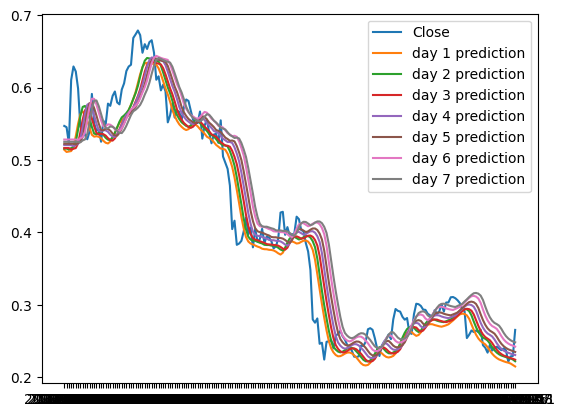

In [15]:
w = test_results(lstm, scaled_train_df, scaled_test_df, target, features)

In [16]:
new_df = pd.concat((scaled_train_df, scaled_test_df))

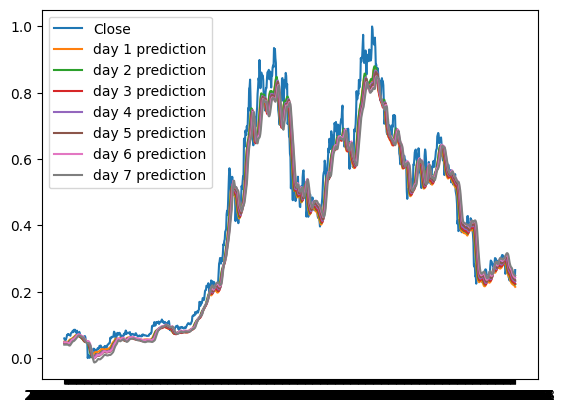

In [17]:
d = test_results(lstm, new_df[:21], new_df[21:], target, features)